#  Lab 4 - Cleaning and EDA of IMDB

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> EDA  </li>
<li> Determining the Best Movies </li>
<li>Trends in Popularity of Genres </li>
</ol>

## Learning Objectives

About 10000 "best movies" were fetched and parsed from IMDB. 

`imdb_top_10000.txt` contain data tabular format as a CSV file. In this lab we'll clean and further parse the data. We'll then do some exploratory data analysis to answer questions about these best books and popular genres.

By the end of this lab, you should be able to:

1. Load and systematically address missing values, ancoded as NaN values in our data set, for example, by removing observations associated with these values.

2. Parse columns in the dataframe to create new dataframe columns.
3. Create and interpret visualizations to explore the data set


### Basic EDA workflow


The basic workflow is as follows:

1. **Scrape**  data using beautiful soup and python request.
2. **Build** a DataFrame from the data (ideally, put all data in this object)
3. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
4. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
5. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## 1. Loading and Cleaning with Pandas
Read in the `imdb_top_10000.txt` file, examine the data, and do any necessary data cleaning.
The textfile is tab-separated, and doesn't have any column headers. We set the appropriate keywords in `pd.read_csv` to handle this

Here is a description of the columns (in order) present in this csv file:

```
imdbID: identifier for the IMDB
title: title of the movie
year: the year the movie was released.
score: Rating of the movie in the scale of 1 - 10
votes: Number of votes received for the movie
runtime: Duration of the movie in min
genres: Genre of the movie seperated by '|'
```

In [ ]:
import pandas as pd
import matplotlib as plt

In [ ]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t')

In [ ]:
df.head()

tt0111161 The Shawshank Redemption (1994)  1994   9.2  619479  142 mins.  \
0  tt0110912             Pulp Fiction (1994)  1994   9.0  490065  154 mins.   
1  tt0137523               Fight Club (1999)  1999   8.8  458173  139 mins.   
2  tt0133093               The Matrix (1999)  1999   8.7  448114  136 mins.   
3  tt1375666                Inception (2010)  2010   8.9  385149  148 mins.   
4  tt0109830             Forrest Gump (1994)  1994   8.7  368994  142 mins.   

                        Crime|Drama  
0                    Crime|Thriller  
1            Drama|Mystery|Thriller  
2           Action|Adventure|Sci-Fi  
3  Action|Adventure|Sci-Fi|Thriller  
4              Comedy|Drama|Romance

In [ ]:
df = pd.read_csv("/content/imdb_top_10000.txt", sep = '\t', names=['imdbID','title','year','score','votes','runtime','genres'])
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     1
dtype: int64

In [ ]:
df.dropna(subset= ['genres'], inplace = True)

In [ ]:
df.shape

(9999, 7)

In [ ]:
df.isna().sum()

imdbID     0
title      0
year       0
score      0
votes      0
runtime    0
genres     0
dtype: int64

## 2. Asking Questions

In [ ]:
#which book has a highest score?

## 3. Parsing and Completing the DataFrame

There are several problems with the DataFrame at this point:

- The runtime column describes a number, but is stored as a string
- The genres column is not atomic -- it aggregates several genres together. This makes it hard, for example, to extract which movies are Comedies.
- The movie year is repeated in the title and year column

In [ ]:
df.dtypes

imdbID      object
title       object
year         int64
score      float64
votes        int64
runtime     object
genres      object
dtype: object

In [ ]:
df.head()

imdbID                            title  year  score   votes    runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479  142 mins.   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065  154 mins.   
2  tt0137523                Fight Club (1999)  1999    8.8  458173  139 mins.   
3  tt0133093                The Matrix (1999)  1999    8.7  448114  136 mins.   
4  tt1375666                 Inception (2010)  2010    8.9  385149  148 mins.   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
runtime = [int(runtime.split(" ")[0]) for runtime in df.runtime]
df['runtime'] = runtime
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  
0                       Crime|Drama  
1                    Crime|Thriller  
2            Drama|Mystery|Thriller  
3           Action|Adventure|Sci-Fi  
4  Action|Adventure|Sci-Fi|Thriller

In [ ]:
set_genre = set()
for genre in df.genres:
  set_genre.update(genre.split("|"))
print(len(set_genre))
  

24


In [ ]:
for genre in set_genre:
  df[genre] = [genre in row.split("|") for row in df.genres]
df.head()


imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

                             genres  Musical   News  Action  ...  Family  \
0                       Crime|Drama    False  False   False  ...   False   
1                    Crime|Thriller    False  False   False  ...   False   
2            Drama|Mystery|Thriller    False  False   False  ...   False   
3           Action|Adventure|Sci-Fi    False  False    True  ...   False   
4  Action|Adventure|Sci-Fi|Thriller    False  False    True  ...   False   

   Drama  Horror  Thriller  Adventure  History  Biography  Adult  Romance  \
0   True   False     False      False    False      False  False    False   
1  False   False      True      False    False      False  False    False   
2   True   False      True      False    False      False  False    False   
3  False   False     False       True    False      False  False    False   
4  False   False      True       True    False      False  False    False   

   Comedy  
0   False  
1   False  
2   False  
3   False  
4   False  

[5 rows x 31 columns]

In [ ]:
df.drop('genres', axis= 1, inplace=True)

In [ ]:
df.head()

imdbID                            title  year  score   votes  runtime  \
0  tt0111161  The Shawshank Redemption (1994)  1994    9.2  619479      142   
1  tt0110912              Pulp Fiction (1994)  1994    9.0  490065      154   
2  tt0137523                Fight Club (1999)  1999    8.8  458173      139   
3  tt0133093                The Matrix (1999)  1999    8.7  448114      136   
4  tt1375666                 Inception (2010)  2010    8.9  385149      148   

   Musical   News  Action  Mystery  ...  Family  Drama  Horror  Thriller  \
0    False  False   False    False  ...   False   True   False     False   
1    False  False   False    False  ...   False  False   False      True   
2    False  False   False     True  ...   False   True   False      True   
3    False  False    True    False  ...   False  False   False     False   
4    False  False    True    False  ...   False  False   False      True   

   Adventure  History  Biography  Adult  Romance  Comedy  
0      False    False      False  False    False   False  
1      False    False      False  False    False   False  
2      False    False      False  False    False   False  
3       True    False      False  False    False   False  
4       True    False      False  False    False   False  

[5 rows x 30 columns]

In [ ]:
df['title'] = [t[0:-7] for t in df.title]
df.head()

imdbID                     title  year  score   votes  runtime  Musical  \
0  tt0111161  The Shawshank Redemption  1994    9.2  619479      142    False   
1  tt0110912              Pulp Fiction  1994    9.0  490065      154    False   
2  tt0137523                Fight Club  1999    8.8  458173      139    False   
3  tt0133093                The Matrix  1999    8.7  448114      136    False   
4  tt1375666                 Inception  2010    8.9  385149      148    False   

    News  Action  Mystery  ...  Family  Drama  Horror  Thriller  Adventure  \
0  False   False    False  ...   False   True   False     False      False   
1  False   False    False  ...   False  False   False      True      False   
2  False   False     True  ...   False   True   False      True      False   
3  False    True    False  ...   False  False   False     False       True   
4  False    True    False  ...   False  False   False      True       True   

   History  Biography  Adult  Romance  Comedy  
0    False      False  False    False   False  
1    False      False  False    False   False  
2    False      False  False    False   False  
3    False      False  False    False   False  
4    False      False  False    False   False  

[5 rows x 30 columns]

## 4. EDA

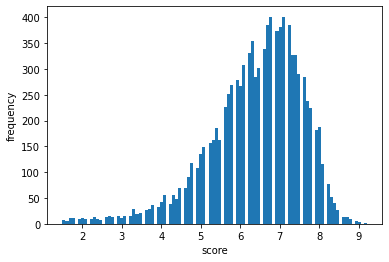

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x  =  df.score
plt.hist(x,bins = 100)
plt.xlabel("score")
plt.ylabel("frequency")
plt.show()


## 5. Determining Best Movies

In [ ]:
Movie = df.groupby("year", sort = False)
year_2010 = Movie.get_group(2010)
highest_score = year_2010[year_2010['score'] == year_2010.score.max()]
print(highest_score)


      imdbID      title  year  score   votes  runtime  Musical   News  Action  \
4  tt1375666  Inception  2010    8.9  385149      148    False  False    True   

   Mystery  ...  Family  Drama  Horror  Thriller  Adventure  History  \
4    False  ...   False  False   False      True       True    False   

   Biography  Adult  Romance  Comedy  
4      False  False    False   False  

[1 rows x 30 columns]


## 6. Trends in Popularity of Genres

In [ ]:
genredf = df[list(set_genre)]
genredf.head()

Musical   News  Action  Mystery  Animation  Fantasy    War  Western  Sport  \
0    False  False   False    False      False    False  False    False  False   
1    False  False   False    False      False    False  False    False  False   
2    False  False   False     True      False    False  False    False  False   
3    False  False    True    False      False    False  False    False  False   
4    False  False    True    False      False    False  False    False  False   

   Sci-Fi  ...  Family  Drama  Horror  Thriller  Adventure  History  \
0   False  ...   False   True   False     False      False    False   
1   False  ...   False  False   False      True      False    False   
2   False  ...   False   True   False      True      False    False   
3    True  ...   False  False   False     False       True    False   
4    True  ...   False  False   False      True       True    False   

   Biography  Adult  Romance  Comedy  
0      False  False    False   False  
1      False  False    False   False  
2      False  False    False   False  
3      False  False    False   False  
4      False  False    False   False  

[5 rows x 24 columns]

In [ ]:
genredf.sum()

Musical        260
News             1
Action        1891
Mystery       1009
Animation      314
Fantasy        916
War            512
Western        235
Sport          288
Sci-Fi         897
Film-Noir       40
Crime         1867
Music          371
Reality-TV       1
Family         754
Drama         5697
Horror        1215
Thriller      2832
Adventure     1313
History        358
Biography      394
Adult            9
Romance       2441
Comedy        3922
dtype: int64

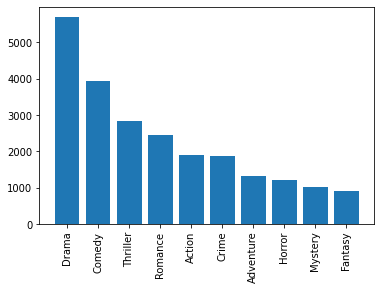

In [ ]:
Y = genredf.sum().sort_values(ascending = False)[:10]
X = Y.index
plt.bar(X,Y)
plt.xticks(rotation=90)
plt.show()